In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('dk_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23750 entries, 0 to 23749
Data columns (total 10 columns):
CUSTOMER_ID         23750 non-null int64
ORDERS              23750 non-null int64
FIRST_ORDER_DATE    23750 non-null object
LAST_ORDER_DATE     23750 non-null object
TOTAL_CM2           23750 non-null object
NET_SALES           23750 non-null object
CM2_REL             23750 non-null object
ZTQ_ID              23750 non-null int64
START_DATE          23750 non-null object
EXPIRY_DATE         23750 non-null object
dtypes: int64(3), object(7)
memory usage: 1.8+ MB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,8479472,3,2017-07-14,2018-03-18,31.5748,137.3227,22.99,52,2017-07-14,2020-07-27
1,7492765,12,2017-06-05,2018-05-27,230.4194,1313.8545,17.54,54,2017-10-14,2020-11-23
2,2512796,1,2017-08-23,2017-08-23,1.3880,21.5007,6.46,52,2014-10-20,2017-10-20
3,8713533,2,2017-06-25,2018-04-12,16.5123,140.1693,11.78,54,2014-11-01,2017-11-01
4,9521049,6,2017-07-03,2018-04-03,44.3295,425.5318,10.42,52,2017-12-12,2020-12-15


In [11]:
tiers = [51, 52, 53, 54, 55, 56]

...........................................................TIER  51 ..........................................................


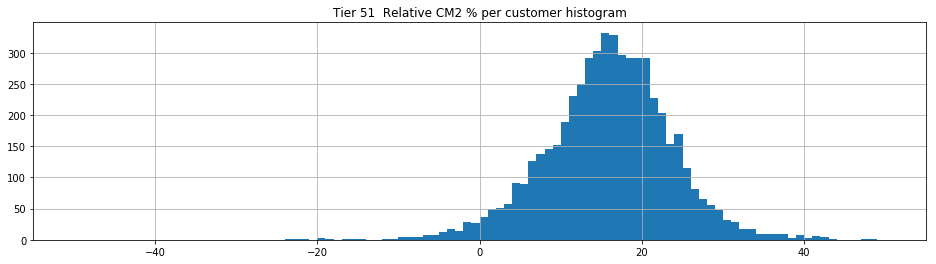

,CM2_REL
count,5457.00
mean,15.87
std,7.91
min,-73.73
25%,11.42
50%,16.13
75%,20.68
max,53.10


CM2% threshold >= 5  is the percentile 7.92
CM2% threshold >= 7  is the percentile 11.86
CM2% threshold >=  12.527999999999999  is the percentile 30 allowing us to stay with the 70% of our sample


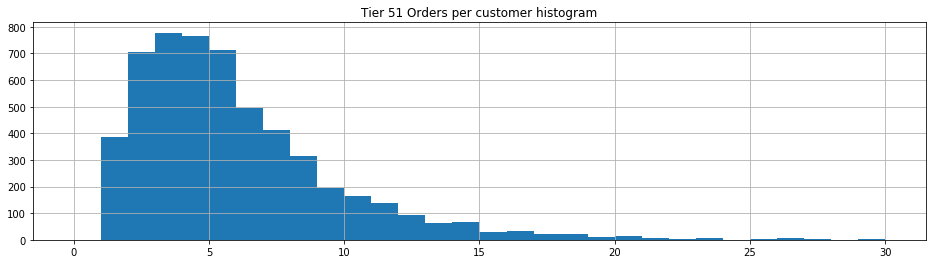

,ORDERS
count,5457.00
mean,5.55
std,4.05
min,1.00
25%,3.00
50%,5.00
75%,7.00
max,52.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  74.62  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  71.54  % from our customers
With CM2% threshold >=  12.527999999999999  and Orders >=  3.0  we keep eligible a  56.59  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


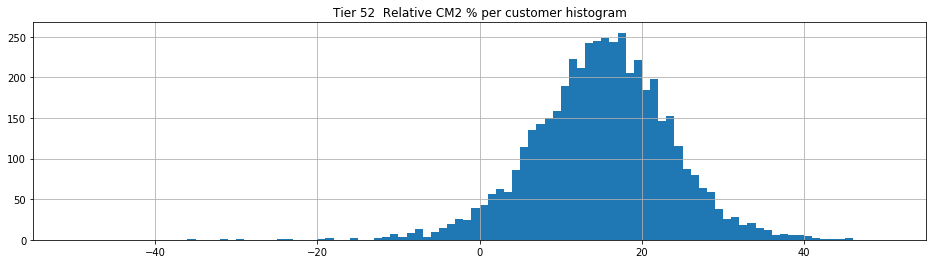

,CM2_REL
count,4755.00
mean,15.07
std,8.43
min,-54.63
25%,9.98
50%,15.30
75%,20.48
max,45.88


CM2% threshold >= 5  is the percentile 10.33
CM2% threshold >= 7  is the percentile 15.56
CM2% threshold >=  11.204  is the percentile 30 allowing us to stay with the 70% of our sample


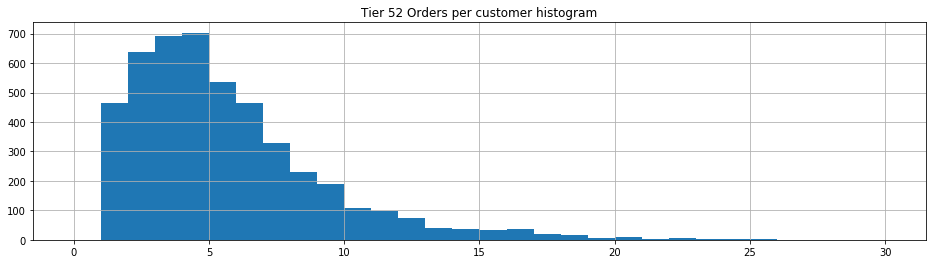

,ORDERS
count,4755.00
mean,5.22
std,3.91
min,1.00
25%,3.00
50%,4.00
75%,7.00
max,65.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  69.8  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  66.06  % from our customers
With CM2% threshold >=  11.204  and Orders >=  3.0  we keep eligible a  54.95  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


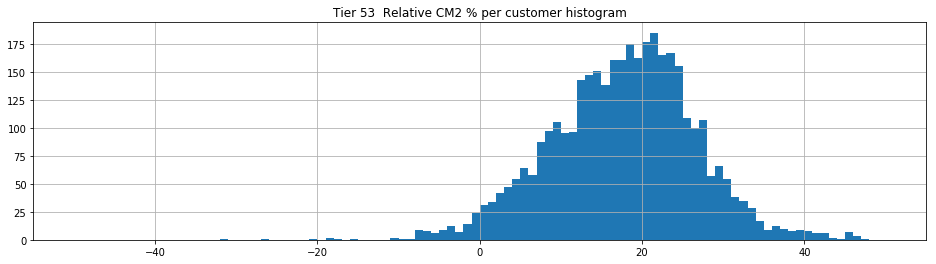

,CM2_REL
count,3693.00
mean,17.67
std,9.01
min,-31.96
25%,12.13
50%,18.18
75%,23.59
max,52.94


CM2% threshold >= 5  is the percentile 8.34
CM2% threshold >= 7  is the percentile 11.64
CM2% threshold >=  13.355999999999998  is the percentile 30 allowing us to stay with the 70% of our sample


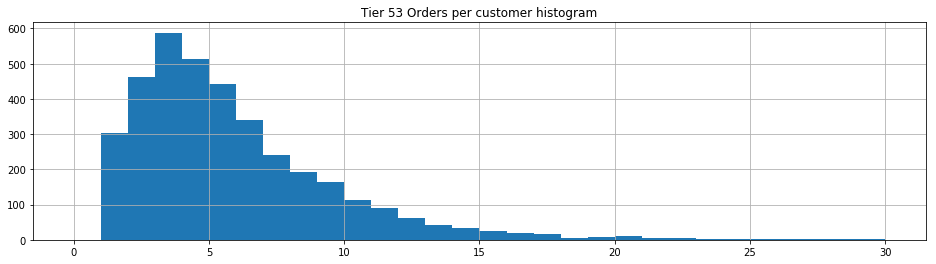

,ORDERS
count,3693.00
mean,5.45
std,4.36
min,1.00
25%,3.00
50%,4.00
75%,7.00
max,102.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  73.27  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  70.84  % from our customers
With CM2% threshold >=  13.355999999999998  and Orders >=  3.0  we keep eligible a  56.32  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


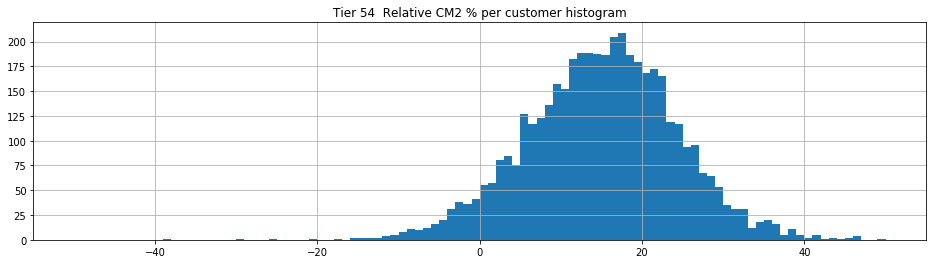

,CM2_REL
count,4446.00
mean,15.06
std,9.36
min,-38.74
25%,9.07
50%,15.34
75%,21.26
max,74.61


CM2% threshold >= 5  is the percentile 13.45
CM2% threshold >= 7  is the percentile 18.94
CM2% threshold >=  10.47  is the percentile 30 allowing us to stay with the 70% of our sample


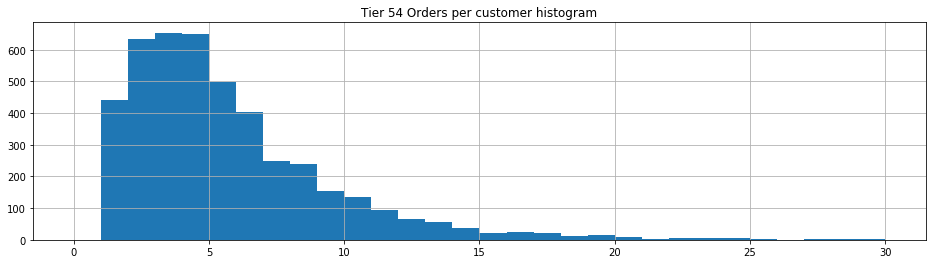

,ORDERS
count,4446.00
mean,5.26
std,4.09
min,1.00
25%,3.00
50%,4.00
75%,7.00
max,69.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  66.08  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  61.94  % from our customers
With CM2% threshold >=  10.47  and Orders >=  3.0  we keep eligible a  53.26  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


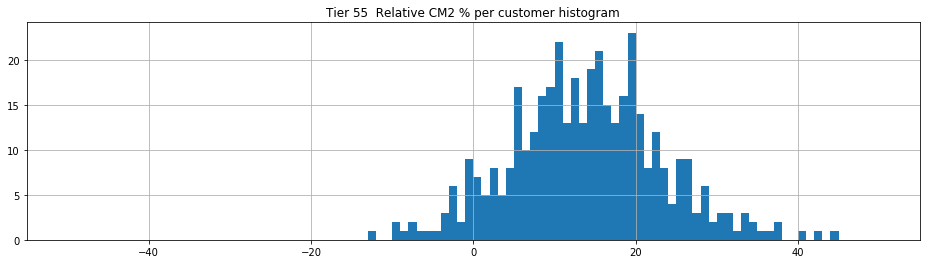

,CM2_REL
count,402.00
mean,14.00
std,9.51
min,-12.10
25%,7.96
50%,14.04
75%,19.92
max,50.59


CM2% threshold >= 5  is the percentile 15.42
CM2% threshold >= 7  is the percentile 22.14
CM2% threshold >=  9.146  is the percentile 30 allowing us to stay with the 70% of our sample


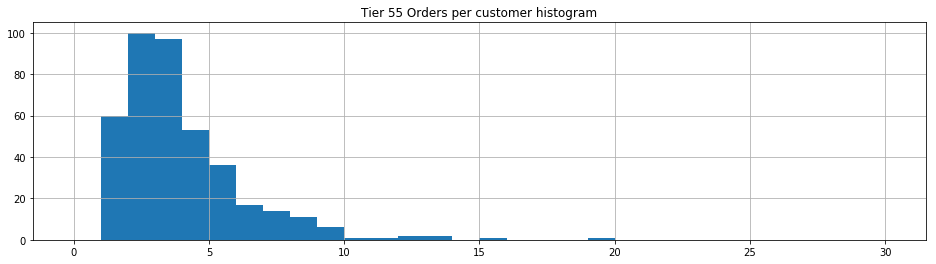

,ORDERS
count,402.00
mean,3.46
std,2.34
min,1.00
25%,2.00
50%,3.00
75%,4.00
max,19.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  71.89  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  65.42  % from our customers
With CM2% threshold >=  9.146  and Orders >=  2.0  we keep eligible a  59.2  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


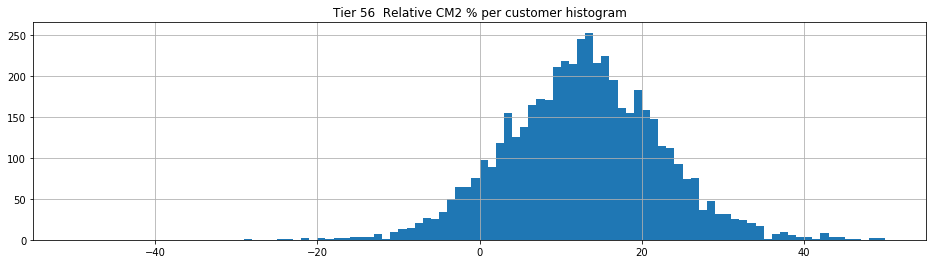

,CM2_REL
count,4997.00
mean,12.72
std,9.43
min,-28.82
25%,6.65
50%,12.76
75%,18.94
max,61.30


CM2% threshold >= 5  is the percentile 20.31
CM2% threshold >= 7  is the percentile 26.38
CM2% threshold >=  8.048  is the percentile 30 allowing us to stay with the 70% of our sample


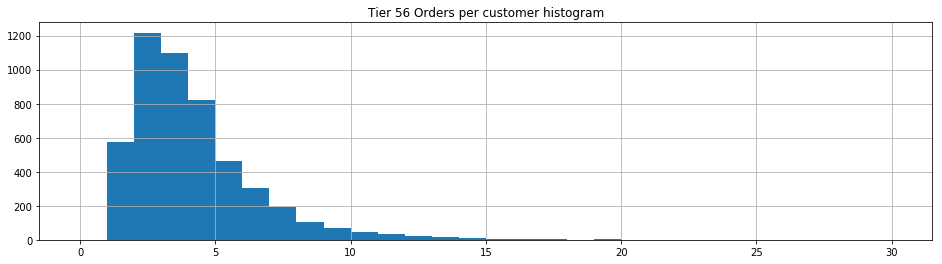

,ORDERS
count,4997.00
mean,3.66
std,2.35
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,25.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  70.78  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  65.18  % from our customers
With CM2% threshold >=  8.048  and Orders >=  2.0  we keep eligible a  61.92  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,3055.0,64.691324,27.898563,19.098256,45.177921,58.498420,77.319869,322.197420
52,2563.0,71.506123,34.330561,21.670220,49.581338,63.411800,84.796523,565.366725
53,2002.0,68.676722,30.724914,21.535725,47.975700,61.576020,81.503556,400.586400
54,2326.0,78.972911,40.558258,20.884700,53.604519,70.380772,94.507173,1022.767400
55,138.0,57.615534,22.345911,20.440425,42.053149,51.535635,68.340994,133.206460
56,2004.0,69.866232,34.234864,20.180100,48.698256,63.078807,82.419669,760.638514


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,3055.0,15.940033,6.986144,-14.30,11.7550,16.170,20.3700,42.53
52,2563.0,15.098127,7.625546,-54.63,10.4250,15.250,20.0000,41.38
53,2002.0,17.667023,8.462960,-18.01,12.3325,18.050,23.3900,46.74
54,2326.0,14.793538,8.837844,-14.38,9.0625,15.020,20.8175,46.51
55,138.0,12.597826,8.435172,-12.10,6.9525,12.845,18.2650,33.34
56,2004.0,12.604611,8.622192,-19.30,6.8500,12.565,18.4975,49.03


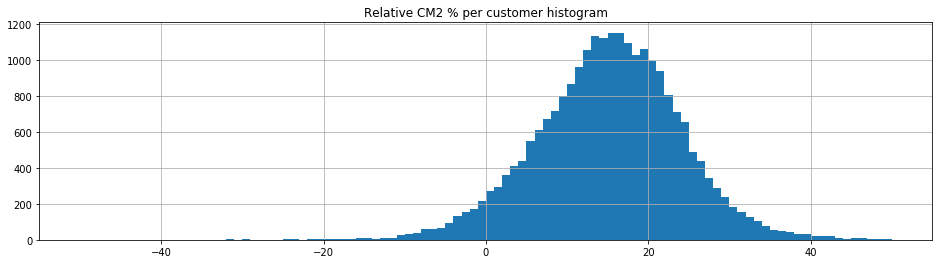

,CM2_REL
count,23750.00
mean,15.14
std,8.96
min,-73.73
25%,9.60
50%,15.40
75%,20.93
max,74.61


CM2% threshold >= 5  is the percentile 12.24
CM2% threshold >= 6  is the percentile 14.55
CM2% threshold >= 7  is the percentile 17.12
CM2% threshold >= 8  is the percentile 19.96
CM2% threshold >= 9  is the percentile 22.97
CM2% threshold >= 10  is the percentile 26.34
CM2% threshold >=  11.0  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

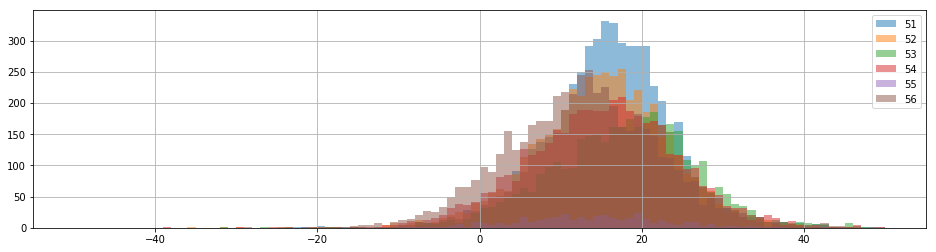

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56])
plt.show()   